# The material presented in this notebook is for use in Introduction to Deep Learning ECE.685D course, Duke University, Fall 2022.

* ### Static frameworks such as Theano, Caffe, and TensorFlow require the computational graph to be first declared, compiled, and then executed.
* ### This leads to very efficient implementations (in production and mobile settings), it can become very painful during research and development. 
* ### Modern frameworks such as Chainer, DyNet, and PyTorch implement dynamic computational graphs. These are more flexible, and provide imperative style of coding.
* ### We do not need to compile the models before every execution.
* ### __PyTorch is a library (framework) which is optimized for tensor manipulation, and it provides a series of packages for deep learning.__

## __Modules and packages in Pytorch__
* ### __torch :__  a Tensor library like Numpy, with strong GPU support
* ### __torch.autograd :__ an automatic differentiation library that supports all differentiable Tensor operations in torch
* ### __torch.nn :__ a neural networks library integrated with autograd
* ### __torch.nn.functional :__ implementation of many useful mathematical functions such as Relu, Tanh, and so on.
* ### __torch.optim :__ an optimization package to be used with torch.nn with standard optimization methods such as SGD, RMSProp, Adam, and so on.
* ### __torch.multiprocessing :__ python multiprocessing, but with magical memory sharing of torch Tensors across processes. Useful for data loading and hogwild training.
* ### __torch.utils :__ DataLoader, Trainer and other utility functions for convenience
* ### __torchvision :__ Consists of popular datasets, model architectures, and common image transformations for computer vision.
* ### __torchaudio:__ Consists of I/O, popular datasets and common audio transformations (oading sound files in the wav and mp3 format). 
* ### __torchtext:__ Consists of  data processing utilities and popular datasets for natural language

## __Importing modules and packages__

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np


In [2]:
# Check that MPS is available
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

    # Create a Tensor directly on the mps device
    x = torch.ones(5, device=mps_device)
    # Or
    x = torch.ones(5, device="mps")

    # Any operation happens on the GPU
    y = x * 2

torch.backends.mps.is_available()


True

## __Diffferent level of abstractions__ 
* ### __Tensor:__ Like array in Numpy, but runs on a GPU to accelerate computing
* ### __Module:__ A neural network layer --> storing states or learnable weights

## __Getting started with Tensors__ 
https://pytorch.org/docs/stable/tensors.html

## Constructing tensor directly using torch makes the data type as (default data type):
* ### 32-bit floating point
* ### torch.float32 or torch.float
* ### torch.FloatTensor

## Construct a 5x3 matrix, uninitialized:

In [3]:
x = torch.empty(100, 3)

x = torch.empty(5,3)

In [4]:
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

## Construct a 2x3 matrix, uninitialized

In [5]:
x = torch.Tensor(1)
x

tensor([0.])

## Construct a a randomly (uniform distribution on the interval [0, 1]) initialized $5\times 3$:

In [6]:
x = torch.rand(5000,3000).to('mps')
y =  torch.rand(3000,5000)


In [7]:
x

tensor([[0.5906, 0.9272, 0.9428,  ..., 0.3035, 0.7183, 0.3241],
        [0.6741, 0.1225, 0.6375,  ..., 0.3424, 0.2140, 0.0485],
        [0.3202, 0.8774, 0.4583,  ..., 0.5721, 0.5567, 0.9984],
        ...,
        [0.0666, 0.2024, 0.7099,  ..., 0.7174, 0.2138, 0.4145],
        [0.4680, 0.2087, 0.5580,  ..., 0.7760, 0.9784, 0.7293],
        [0.2770, 0.7999, 0.6328,  ..., 0.7872, 0.4109, 0.1393]],
       device='mps:0')

## Construct a a randomly (Nomral distribution) initialized $5\times 3$:

In [8]:
x = torch.randn(5, 3)
x

tensor([[ 0.7486, -0.3319, -0.5486],
        [ 1.5538,  0.9944,  0.8574],
        [ 2.0443, -0.0986,  0.6355],
        [ 0.5049, -1.2381,  2.0815],
        [-0.0403, -1.3926,  0.3176]])

## Construct a zero matrix and of dtype long:

In [9]:
x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [10]:
x = torch.ones(5, 3)

In [11]:
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

## Construct a tensor from data (a 3-d tensor):

In [12]:
y = torch.tensor([[[5.5, 3],[-3.8, 100]],[[1, 30],[023.8, 10]]])

In [13]:
y.shape[1]

2

## The size or shape of a tensor

In [14]:
print(x.size())
print('*'*40)
x.shape  # shape built-in method in Numpy

torch.Size([5, 3])
****************************************


torch.Size([5, 3])

## Construct a tensor based on an existing tensor:

###  Creating a filled tensor 
* ### Any PyTorch method with an underscore (_) means an in-place operation (it modifies the content without creating a new object).

In [15]:
x = torch.ones(4,3,1)
x.fill_(5)
x

tensor([[[5.],
         [5.],
         [5.]],

        [[5.],
         [5.],
         [5.]],

        [[5.],
         [5.],
         [5.]],

        [[5.],
         [5.],
         [5.]]])

###  Reusing the properties of the input tensor, e.g. dtype, unless new values are provided by user
* ### Construcitng tensor from list makes data type as __torch.FloatTensor (float32)__ or __torch.Longtensor (signed int64)__

In [16]:
x.type()

'torch.FloatTensor'

In [17]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))
    
c = [[1., 1., 1.]]*3
c1 = torch.tensor(c)
describe(c1)
print('*'*40)

cc = [[1, 1, 1]]*3
cc1 = torch.tensor(cc)
describe(cc1)
print('*'*40)

d = torch.ones((3,3))
describe(d)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
****************************************
Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


### Changing the data type of a tensor in different ways:

In [18]:
x = torch.ones(1,5)
y = torch.randn_like(x) 
z = torch.randn_like(x, dtype=torch.double) 
t = y.long()

In [19]:
describe(z)

Type: torch.DoubleTensor
Shape/size: torch.Size([1, 5])
Values: 
tensor([[-0.5469,  0.1024, -0.8025, -0.8389, -0.6767]], dtype=torch.float64)


In [20]:
describe(x)
print('*'*40)
describe(y)
print('*'*40)
describe(z)
print('*'*40)
describe(t)

Type: torch.FloatTensor
Shape/size: torch.Size([1, 5])
Values: 
tensor([[1., 1., 1., 1., 1.]])
****************************************
Type: torch.FloatTensor
Shape/size: torch.Size([1, 5])
Values: 
tensor([[ 0.9572, -1.1718,  0.8479,  0.5489,  0.2540]])
****************************************
Type: torch.DoubleTensor
Shape/size: torch.Size([1, 5])
Values: 
tensor([[-0.5469,  0.1024, -0.8025, -0.8389, -0.6767]], dtype=torch.float64)
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([1, 5])
Values: 
tensor([[ 0, -1,  0,  0,  0]])


# Getting started with Operations

## Adding, subtracting,multiplying, deviding of two tensors (elementwise)

In [21]:
x = torch.randn(5,3)
y = torch.ones(5,3)
a = x + y
print(a)
b = x * y
print(b)
c = x/y
print(c)

tensor([[ 1.5421,  1.3792,  0.4112],
        [ 0.2263,  0.9741,  1.1715],
        [ 0.0494, -0.1099,  1.4591],
        [ 0.6836, -0.0480,  0.4073],
        [ 0.7121,  1.1024,  1.7599]])
tensor([[ 0.5421,  0.3792, -0.5888],
        [-0.7737, -0.0259,  0.1715],
        [-0.9506, -1.1099,  0.4591],
        [-0.3164, -1.0480, -0.5927],
        [-0.2879,  0.1024,  0.7599]])
tensor([[ 0.5421,  0.3792, -0.5888],
        [-0.7737, -0.0259,  0.1715],
        [-0.9506, -1.1099,  0.4591],
        [-0.3164, -1.0480, -0.5927],
        [-0.2879,  0.1024,  0.7599]])


In [22]:
x = torch.randn(5,3)
y = torch.tensor([[2,3,4]])
x + y 

tensor([[2.2400, 3.5542, 5.1143],
        [2.3885, 2.8250, 2.1205],
        [2.8200, 4.6905, 2.1010],
        [3.8187, 1.2465, 4.3597],
        [2.3025, 2.7341, 3.4818]])

In [23]:
x

tensor([[ 0.2400,  0.5542,  1.1143],
        [ 0.3885, -0.1750, -1.8795],
        [ 0.8200,  1.6905, -1.8990],
        [ 1.8187, -1.7535,  0.3597],
        [ 0.3025, -0.2659, -0.5182]])

In [24]:
torch.add(x, y)
torch.sub(x, y)
torch.mul(x, y)
describe(torch.div(x, y))

Type: torch.FloatTensor
Shape/size: torch.Size([5, 3])
Values: 
tensor([[ 0.1200,  0.1847,  0.2786],
        [ 0.1942, -0.0583, -0.4699],
        [ 0.4100,  0.5635, -0.4747],
        [ 0.9093, -0.5845,  0.0899],
        [ 0.1513, -0.0886, -0.1295]])


## item() to get the value form a 0-rank tenser as a Python number

In [25]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.9992])
-1.9991884231567383


### Reshaping a torch tensor using __view__ (buitl in function in torch), or using __reshape__ (built in method in Numpy)

In [26]:
x = torch.arange(10)   ## similar to "range" in python
y = x.view(5,2)
z = x.reshape(5,2,1,1)
describe(x)
print('*'*40)
describe(y)
print('*'*40)
describe(z)

Type: torch.LongTensor
Shape/size: torch.Size([10])
Values: 
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([5, 2])
Values: 
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([5, 2, 1, 1])
Values: 
tensor([[[[0]],

         [[1]]],


        [[[2]],

         [[3]]],


        [[[4]],

         [[5]]],


        [[[6]],

         [[7]]],


        [[[8]],

         [[9]]]])


### Applying to a specific dimension of a tensor
* ### rows denote the dimention 0
* ### columns denote the dimention 1

In [27]:
x = torch.tensor([[3,2],[4,3]])
print(torch.sum(x))
print('*'*40)
describe(torch.sum(x, dim=0))
print('*'*40)
describe(torch.sum(x, dim=1))
print('*'*40)
describe(torch.sum(x))
print('*'*40)

tensor(12)
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([7, 5])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([5, 7])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
12
****************************************


## Converting a Torch Tensor to a NumPy array and vice versa
https://pytorch.org/docs/stable/notes/cuda.html

### From Tensor to Numpy

In [28]:
a = torch.ones(5)
x = a.numpy()

In [29]:
describe(a)

Type: torch.FloatTensor
Shape/size: torch.Size([5])
Values: 
tensor([1., 1., 1., 1., 1.])


In [30]:
x

array([1., 1., 1., 1., 1.], dtype=float32)

### preserving the data type after converting to the numpy array

In [31]:
x

array([1., 1., 1., 1., 1.], dtype=float32)

### From Numpy to Tensor
* ### Construcitng a tensor from a numpy array with float data type makes tensor data type as torch.DoubleTensor (float64)
* ### Construcitng a tensor from a numpy array with integr data type makes tensor data type as torch.LongTensor (int64)

In [32]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
describe(b) 

Type: torch.DoubleTensor
Shape/size: torch.Size([5])
Values: 
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## Matrix inner product (similar to np.dot() )

In [33]:
a = torch.randn(2,3)
b = torch.randn(3,3)
describe(torch.mm(a,b))
print('*'*40)
describe(torch.mm(b, a.T))
print('*'*40 + '  Using np.dot  ' + '*'*40)
np.dot(a,b)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 1.3901,  0.2585, -0.2947],
        [-5.6007, -1.7285,  3.5900]])
****************************************
Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[ 1.1214, -1.4503],
        [-0.2655,  0.9652],
        [ 0.5017,  1.5543]])
****************************************  Using np.dot  ****************************************


array([[ 1.3901323 ,  0.25847393, -0.2946853 ],
       [-5.6007385 , -1.7284819 ,  3.5900083 ]], dtype=float32)

## Removing dimension with size 1 from a Tensor

In [34]:
a = torch.rand(5,1,2)
print(a.size())
b = torch.squeeze(a, dim=0)
print(b.size())

torch.Size([5, 1, 2])
torch.Size([5, 1, 2])


## Expanding dimension a Tensor

In [35]:
a = torch.rand(5,2,1)
print(a.size())
b = torch.unsqueeze(a, dim=2)
print(b.size())

torch.Size([5, 2, 1])
torch.Size([5, 2, 1, 1])


### Manipulating torch tensors

In [36]:
x = torch.ones(3, 2)
x[:, 1] += 1
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


## Indexing, Slicing, and Joining (very familiar to Numpy)

* ### Simple indexing

In [37]:
x = torch.arange(6).view(2, 3)
describe(x)
print('*'*40)
y = x[0, 0]
describe(y)
print('*'*40)
z = x[1, 1]
describe(z)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
0
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
4


* ### More complicated indexing settings (Indices __should__ be a LongTensor by default)

In [38]:
x = torch.arange(10).view(2, 5)
describe(x)
print('*'*40)
indices_1 = torch.LongTensor([0, 2])
y = torch.index_select(x, dim=1, index=indices_1)
describe(y)
print('*'*40)
indices_2 = torch.from_numpy(np.array([0, 2]))
z = torch.index_select(x, dim=1, index=indices_2)
describe(z)
print('*'*40 + '  Type of tensor indices_2  '+'*'*40 )
describe(indices_2)
print('*'*40)
indices_3 = torch.LongTensor([0])
t = torch.index_select(x, dim=0, index=indices_3)
describe(t)
print('*'*40)
row_ind = torch.tensor([0]).long()
col_ind = torch.LongTensor([2, 4])
describe(x[row_ind, col_ind])

Type: torch.LongTensor
Shape/size: torch.Size([2, 5])
Values: 
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [5, 7]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [5, 7]])
****************************************  Type of tensor indices_2  ****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([0, 2])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([1, 5])
Values: 
tensor([[0, 1, 2, 3, 4]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([2, 4])


* ### Joining torch tensors using __torch.cat__ and __torch.stack__ 

In [39]:
x = torch.arange(6).view(2,3)
describe(x)
print('*'*40)
describe(torch.cat((x,x), dim=1))
print('*'*40)
describe(torch.cat((x,x), dim=0))
print('*'*40)
describe(torch.stack((x, x)))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
****************************************
Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [40]:
torch.arange(1,5,2)

tensor([1, 3])

In [41]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

## CUDA Tensors and GPUs

* ### Access to the GPUs is accomplished by an API called CUDA. 
* ### NVIDIA has created the CUDA API for only NVIDIA GPUs.
* ### PyTorch offers CUDA tensor objects that are not different from the regular CPU-bound tensors except for end user.
* ### Transfering Tensors to different devices, e.g., GPU, CPU using the __''.to''__ method.
* ### To run on GPU, just cast tensors to a cuda data type!

### First check if the CUDA interface exists on your system (__cuda.FloatTensor__ is a defualt data type for created toech tensors in GPU)

In [42]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    dtype = torch.cuda.FloatTensor         # casting tensors to a cuda data type
else:
    device = torch.device("cpu")

In [43]:
device

device(type='cpu')

### Directly create a tensor on GPU, or use strings ``.to("cuda")``

In [44]:
b = torch.ones(3,4)
y = torch.ones_like(b, device='cpu', dtype=torch.float)  
x = torch.randn(y.size()).to('cuda') # or .to(y.device)

AssertionError: Torch not compiled with CUDA enabled

In [8]:
z = x + y
print(z)

RuntimeError: ignored

## AUTOGRAD: AUTOMATIC DIFFERENTIATION
https://pytorch.org/docs/stable/autograd.html

* ### Central to all neural networks in PyTorch is the autograd package.
* ### Every Tensor has an attribute called __.requires_grad__ which can be True or False.
* ### When it is True, starts to track all operations on it (bookkeeping).
* ### When finishing the computation, one can call __.backward()__ and have all the gradients computed automatically
* ### The gradient for the tensors will be accumulated into __.grad__ attribute

### __To stop a tensor from tracking history:__

* ## First approach:
###    - calling .detach() to detach it from the computation history
###    - It also prevents future computation from being tracked

* ## Second  approach:
###   - wrap the code block using __with torch.no_grad()__ 
###   - Deactivating computation of the gradient for trainable parameters with __requires_grad=False__

## Each tensor has a .grad_fn attribute that references a Function that has created the Tensor 
(grad_fn is None for Tensors created by the user)

In [9]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

### Operating a function on x makes the resulting tensor have __grad_fn__ attribute

In [10]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

### __requires_grad_(.)__ changes an existing Tensor’s requires_grad flag in-place. 
### The input flag defaults to False if not given

In [11]:
x = torch.arange(4).float().view(2,2)
print(x)
print(x.requires_grad)

tensor([[0., 1.],
        [2., 3.]])
False


In [12]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [13]:
y = (x * x).sum()
print(y)
print(y.grad_fn)
print(y.requires_grad)

tensor(14., grad_fn=<SumBackward0>)
True


### The backward pass is started by using the __backward()__ method 
###  __backward()__ method operates on a tensor resulting from the evaluation of a loss function. 
### The backward pass calculates a gradient value for a tensor object that involved in the forward pass.

In [14]:
x

tensor([[0., 1.],
        [2., 3.]], requires_grad=True)

In [17]:
x*x

tensor([[0., 1.],
        [4., 9.]], grad_fn=<MulBackward0>)

In [47]:
# if x.grad is not None:
#     x.grad.zero_() # comment this line will accumulate gradients

out = (x * x).sum()
out2 = out + 3
#out2.backward()
print(out)
print(x.grad)
x_grad = torch.autograd.grad(out,x)
print(x_grad)

tensor(14., grad_fn=<SumBackward0>)
tensor([[ 0.,  8.],
        [16., 24.]])
(tensor([[0., 2.],
        [4., 6.]]),)


### To explicitly compute gradients

In [43]:
z = 5*x + 2
print(z)
out = (z* z).sum()
x_grad = torch.autograd.grad(out,x)
print(x_grad)

tensor([[ 2.,  7.],
        [12., 17.]], grad_fn=<AddBackward0>)
(tensor([[ 20.,  70.],
        [120., 170.]]),)


#Simple ML model


In [28]:
x1 = torch.randn(1000)
x2 = torch.randn(1000) * 2 + 15
y = x1**2 + x2

data = torch.stack((x1,x2,y),dim=1)

In [29]:
data.shape

torch.Size([1000, 3])

In [32]:
class net(nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim=3):
    '''
    input_dim, output_dim:self-evident; 
    hidden_dim: all neural networks in this model are using the same hidden layer dimension for simplicity 
    '''
    super().__init__()
    
    neuralnet = [nn.Linear(input_dim,hidden_dim),nn.ELU(),nn.Linear(hidden_dim, output_dim)]
    self.neuralnet = nn.Sequential(*neuralnet)

    
  def forward(self,X):

    y = self.neuralnet(X)

    return y

In [33]:
from torch.nn import MSELoss as MSE
mse = MSE()

In [41]:
import tqdm
from torch.utils.data import Dataset, DataLoader

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
#define a dataloader
loader = DataLoader(data,batch_size=100, shuffle=True)

torch.manual_seed(42)
model = net(input_dim=2, output_dim=1)
EPOCHS = 50
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
MSE = []
tqdm_epoch = tqdm.trange(EPOCHS)
for _ in tqdm_epoch:
  for tr in loader:  
    X = tr[:,0:2]
    y = tr[:,2]
    optimizer.zero_grad()  
    y_est = model(X)
    loss =  mse(y_est,y)
    loss.backward()
    optimizer.step()
  MSE.append(loss.detach().numpy())
  

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 50/50 [00:00<00:00, 55.12it/s]


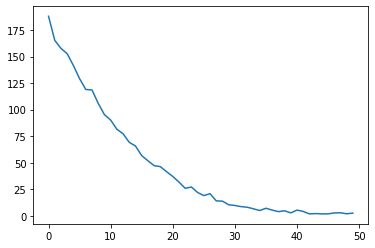

In [40]:
import matplotlib.pyplot as plt
plt.plot(MSE)